# Use age and sex to determine the presence of heart disease in patients of Hungary.

## Introduction: 

Heart disease refers to a range of conditions that affect the heart and the term is often used interchangeably with "cardiovascular disease," which generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack. Heart disease is also a leading cause of death globally, one in five deaths in the U.S. is caused by heart disease and heart disease costs the U.S. 239.9 billion dollars each year. There are many risk factors that are directly associated with the presence of heart disease in patients, such as age and sex. In both sexes, the risk of heart disease increases with age, but the increase is sharper in women. This increase with age is primarily due to the gradual buildup of plaque in the arteries. Additionally, sex plays a role, as men tend to have a higher risk of heart disease at a younger age compared to women. With that said, the goal for us today is to classify patients with or without heart disease by distinguishing the likelihood using the age and sex factors. 

Question: Which demographic group is mostly likely to have heart disease based on the age and sex factors?

The dataset we will be using to perform this process on will be the Hungary Heart Disease database (“reprocessed.hungarian.data”); a data set intended to determine the presence of heart disease in patients of Hungary. It contains data of 14 variables, including age, sex, cholesteral and so on. 

## Preliminary exploratory data analysis

In [1]:
## Run this cell before continuing 
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
set.seed(17)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Importing the Data Set

In [2]:
url <- "https://raw.githubusercontent.com/ANGUO17/dsci-100-2023w2-group-06/main/heart%2Bdisease/reprocessed.hungarian.data"

data <- read.table(url) 

data <- data.frame(lapply(data, function(x) gsub("-9", "NA", x)))
           
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol" , "fbs", 
                    "restecg", "thalach", "exang", "oldpeak", "slope", "ca",
                    "thal", "num")

head(data)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,40,1,2,140,289,0,0,172,0,0,NA,NA,NA,0
2,49,0,3,160,180,0,0,156,0,1,2,NA,NA,1
3,37,1,2,130,283,0,1,98,0,0,NA,NA,NA,0
4,48,0,4,138,214,0,0,108,1,1.5,2,NA,NA,3
5,54,1,3,150,NA,0,0,122,0,0,NA,NA,NA,0
6,39,1,3,120,339,0,0,170,0,0,NA,NA,NA,0


In [3]:
#3 age: age in years
#4 sex: sex (1 = male; 0 = female)
#9 cp: chest pain type
        #-- Value 1: typical angina
       # -- Value 2: atypical angina
        #-- Value 3: non-anginal pain
       # -- Value 4: asymptomatic
#10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#12 chol: serum cholestoral in mg/dl
#16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
#19 restecg: resting electrocardiographic results
       # -- Value 0: normal
       # -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       # -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#32 thalach: maximum heart rate achieved
#38 exang: exercise induced angina (1 = yes; 0 = no)
#40 oldpeak = ST depression induced by exercise relative to rest
#41 slope: the slope of the peak exercise ST segment
        #-- Value 1: upsloping
        #-- Value 2: flat
        #-- Value 3: downsloping
#44 ca: number of major vessels (0-3) colored by flourosopy
#51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#58 num: diagnosis of heart disease (angiographic disease status)
       # -- Value 0: < 50% diameter narrowing
        #-- Value 1: > 50% diameter narrowing
        #(in any major vessel: attributes 59 through 68 are vessels)


#Wrangling data
data_processed <- data |>
    mutate(age = as.numeric(age)) |>
    mutate(trestbps = as.numeric(trestbps)) |>
    mutate(chol = as.numeric(chol)) |>
    mutate(thalach = as.numeric(thalach)) |>
    mutate(sex = as_factor(sex)) |>
    mutate(sex = fct_recode(sex, "male" = "1", "female" = "0")) |>
    mutate(cp = as_factor(cp)) |>
    mutate(cp = fct_recode(cp, "typical angina" = "1", "atypical angina" = "2", 
                                        "non-anginal pain" = "3" , "asymptomatic" = "4" )) |>
    mutate(fbs = as_factor(fbs)) |>
    mutate(fbs = fct_recode(fbs, "true" = "1", "false" = "0" )) |>
    mutate(restecg = as_factor(restecg)) |>
    mutate(restecg = fct_recode(restecg, "normal" = "0", "abnormal" = "1" )) |>
    mutate(exang = as_factor(exang)) |>
    mutate(exang = fct_recode(exang, "yes" = "1", "no" = "0" )) |>
    mutate(slope = as_factor(slope)) |>
    mutate(slope = fct_recode(slope, "upsloping" = "1", "flat" = "2", "downsloping" = "3")) |>
    mutate(thal = as_factor(thal)) |>
    mutate(thal = fct_recode(thal, "normal" = "3", "fixed defect" = "6", "reversable defect" = "7" )) |>
    mutate(diagnosis = as_factor(num)) |>
    mutate(diagnosis = fct_recode(diagnosis, "Sick" = "1","Sick" = "2" ,"Sick" = "3","Sick" = "4", "Healthy" = "0" )) |>

    select(age, sex, chol, diagnosis)


    


head(data_processed)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `trestbps = as.numeric(trestbps)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `chol = as.numeric(chol)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `thalach = as.numeric(thalach)`.
Caused by warning:
! NAs introduced by coercion”


,age,sex,chol,diagnosis
,<dbl>,<fct>,<dbl>,<fct>
1,40,male,289,Healthy
2,49,female,180,Sick
3,37,male,283,Healthy
4,48,female,214,Sick
5,54,male,NA,Healthy
6,39,male,339,Healthy


#### Spliting the data into training and testing sets 

In [4]:
#spliting the data
data_split <- initial_split(data_processed, prop = 0.75, strata = diagnosis)  

data_training <- training(data_split)

data_testing <- testing(data_split)

head(data_training)
head(data_testing)


,age,sex,chol,diagnosis
,<dbl>,<fct>,<dbl>,<fct>
1,40,male,289,Healthy
2,54,male,NA,Healthy
3,39,male,339,Healthy
4,45,female,237,Healthy
5,54,male,208,Healthy
6,48,female,284,Healthy


,age,sex,chol,diagnosis
,<dbl>,<fct>,<dbl>,<fct>
1,37,male,283,Healthy
2,60,male,248,Sick
3,36,male,267,Sick
4,36,male,209,Healthy
5,53,male,518,Sick
6,41,female,250,Healthy


#### Summary

In [5]:
#summarizing the data
data_summarized <- data_training |>
    group_by(diagnosis, sex) |>
    summarize(mean_age = mean(age, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              count = n())

data_summarized


`summarise()` has grouped output by 'diagnosis'. You can override using the
`.groups` argument.


diagnosis,sex,mean_age,mean_chol,count
<fct>,<fct>,<dbl>,<dbl>,<int>
Healthy,male,46.95699,237.5476,93
Healthy,female,46.62500,239.0714,48
Sick,male,49.47826,262.3284,69
Sick,female,48.70000,278.3000,10


#### Data Visualization 

Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”


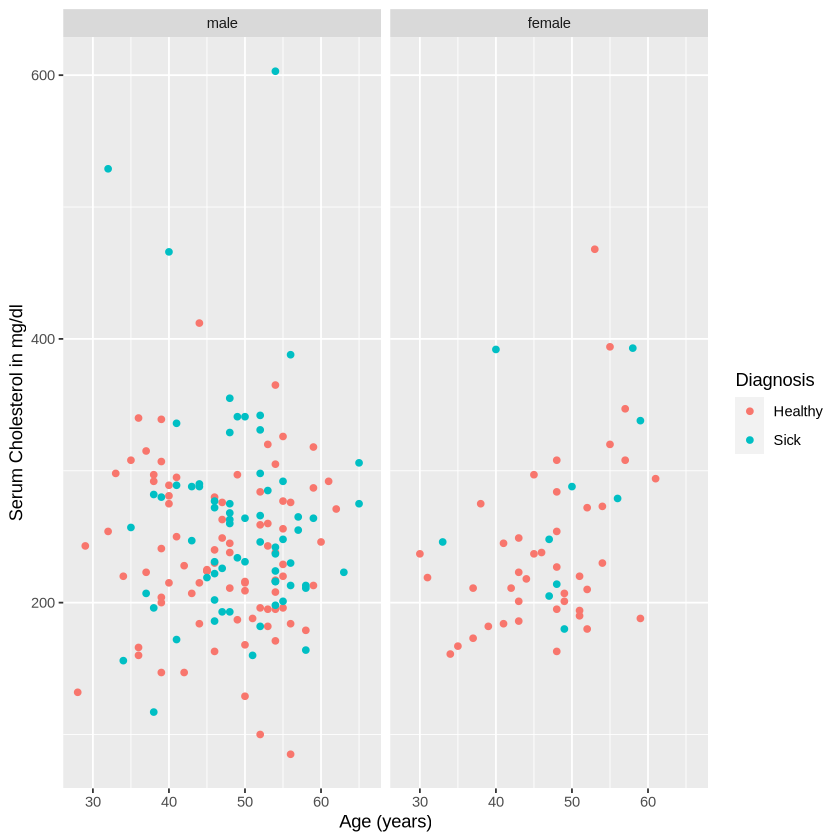

In [10]:
plot_age_vs_chol <- data_training|> ggplot(aes(x = age, y = chol, color = diagnosis)) + 
    geom_point() + facet_grid(cols = vars(sex)) + labs(x = "Age (years)", y = "Serum Cholesterol in mg/dl", color = "Diagnosis")
plot_age_vs_chol

## Method

## Expected Outcomes and Significance

We expect to find a higher rate of heart disease in older individuals, with men having a higher likelihood than women.

By considering both age and sex, healthcare providers can better assess a person's overall risk profile and tailor preventive measures and treatment strategies accordingly. This can lead to a more targeted screening process, with earlier intervention programs for older men and women. Additionally, more information can be distributed to the demographic it would benefit most.

These results could lead researchers to ask questions about why age and sex play such a big role in predicting heart disease by exploring the role of things such as hormones, lifestyle factors, and genetic predispositions. Studies could also find the effectiveness of targeting specific groups in preventative measures in order to reduce the risk of heart disease, compared to general population based approaches.


## Bibliography

1. Centers for Disease Control and Prevention. (n.d.). Centers for Disease Control and Prevention. https://www.cdc.gov/index.htm
   
3. Jousilahti, P., Vartiainen, E., Tuomilehto, J., & Puska, P. (1999). Sex, age, cardiovascular risk factors, and coronary heart disease. Circulation, 99(9), 1165–1172. https://doi.org/10.1161/01.cir.99.9.1165
